In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
sns.set()

In [2]:
assets = ['AAPL', 'AMZN', 'GOLD', 'TSLA']
num_assets = len(assets)

In [3]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.38956985, 0.30748173, 0.11850632, 0.1844421 ])

In [4]:
np.sum(weights)

1.0

In [5]:
data = yf.download(assets, start="2018-1-1", end="2022-12-31")

[*********************100%***********************]  4 of 4 completed


In [6]:
data.head()

Adj Close                                       Close             \
                 AAPL       AMZN       GOLD       TSLA       AAPL       AMZN   
Date                                                                           
2018-01-02  40.888073  59.450500  13.609100  21.368668  43.064999  59.450500   
2018-01-03  40.880947  60.209999  13.430033  21.150000  43.057499  60.209999   
2018-01-04  41.070831  60.479500  13.456889  20.974667  43.257500  60.479500   
2018-01-05  41.538445  61.457001  13.385264  21.105333  43.750000  61.457001   
2018-01-08  41.384159  62.343498  13.197245  22.427334  43.587502  62.343498   

                                   High             ...    Low             \
             GOLD       TSLA       AAPL       AMZN  ...   GOLD       TSLA   
Date                                                ...                     
2018-01-02  15.20  21.368668  43.075001  59.500000  ...  14.61  20.733334   
2018-01-03  15.00  21.150000  43.637501  60.274502  ...  14.74  21.036667   
2018-01-04  15.03  20.974667  43.367500  60.793499  ...  14.79  20.378668   
2018-01-05  14.95  21.105333  43.842499  61.457001  ...  14.87  20.799999   
2018-01-08  14.74  22.427334  43.902500  62.653999  ...  14.64  21.033333   

                 Open                                  Volume            \
                 AAPL       AMZN   GOLD       TSLA       AAPL      AMZN   
Date                                                                      
2018-01-02  42.540001  58.599998  14.65  20.799999  102223600  53890000   
2018-01-03  43.132500  59.415001  15.24  21.400000  118071600  62176000   
2018-01-04  43.134998  60.250000  15.03  20.858000   89738400  60442000   
2018-01-05  43.360001  60.875500  14.99  21.108000   94640000  70894000   
2018-01-08  43.587502  61.799999  14.88  21.066668   82271200  85590000   

                                 
                GOLD       TSLA  
Date                             
2018-01-02  15223200   65283000  
2018-01-03  15155900   67822500  
2018-01-04   8936100  149194500  
2018-01-05   6515600   68868000  
2018-01-08   8362600  147891000  

[5 rows x 24 columns]

In [7]:
data.tail()

Adj Close                                         Close  \
                  AAPL       AMZN       GOLD        TSLA        AAPL   
Date                                                                   
2022-12-23  131.658981  85.250000  17.389999  123.150002  131.860001   
2022-12-27  129.831772  83.040001  17.770000  109.099998  130.029999   
2022-12-28  125.847855  81.820000  17.209999  112.709999  126.040001   
2022-12-29  129.412415  84.180000  17.250000  121.820000  129.610001   
2022-12-30  129.731918  84.000000  17.180000  123.180000  129.929993   

                                                    High             ...  \
                 AMZN       GOLD        TSLA        AAPL       AMZN  ...   
Date                                                                 ...   
2022-12-23  85.250000  17.389999  123.150002  132.419998  85.779999  ...   
2022-12-27  83.040001  17.770000  109.099998  131.410004  85.349998  ...   
2022-12-28  81.820000  17.209999  112.709999  131.029999  83.480003  ...   
2022-12-29  84.180000  17.250000  121.820000  130.479996  84.550003  ...   
2022-12-30  84.000000  17.180000  123.180000  129.949997  84.050003  ...   

                  Low                    Open                        \
                 GOLD        TSLA        AAPL       AMZN       GOLD   
Date                                                                  
2022-12-23  17.090000  121.019997  130.919998  83.250000  17.330000   
2022-12-27  17.430000  108.760002  131.380005  84.970001  17.459999   
2022-12-28  17.110001  108.239998  129.669998  82.800003  17.610001   
2022-12-29  17.219999  117.500000  127.989998  82.870003  17.370001   
2022-12-30  17.040001  119.750000  128.410004  83.120003  17.309999   

                          Volume                                 
                  TSLA      AAPL      AMZN      GOLD       TSLA  
Date                                                             
2022-12-23  126.370003  63814900  57433700  12800800  166989700  
2022-12-27  117.500000  69007800  57284000  11654100  208643400  
2022-12-28  110.349998  85438400  58228600  12970700  221070500  
2022-12-29  120.389999  75703700  54995900   8274800  221923300  
2022-12-30  119.949997  76960600  62330000  12815900  157304500  

[5 rows x 24 columns]

In [8]:
x = data['Adj Close'].pct_change()

In [9]:
ret = (x * weights).sum(axis=1)

In [10]:
cumulative = (ret + 1).cumprod()

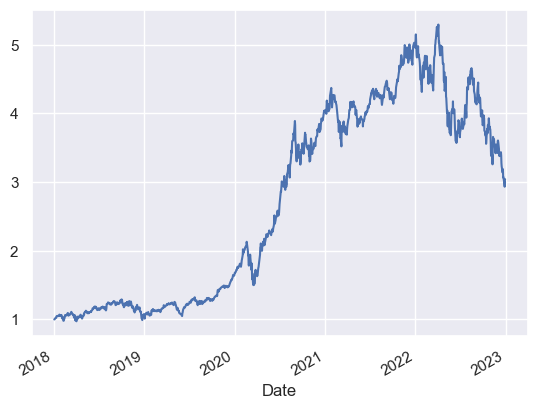

In [11]:
cumulative.plot();

In [12]:
annual_std = np.std(ret) * np.sqrt(252)
annual_std

0.3084621236768351

In [13]:
sharpe = (np.mean(ret) / np.std(ret)) * np.sqrt(252)
sharpe

0.876700021881042

In [14]:
p_weights = []
p_returns = []
p_risk = []
p_sharpe = []

In [15]:
wts = np.random.uniform(size = len(x.columns))
wts = wts / np.sum(wts)

In [16]:
wts

array([0.27086401, 0.0454697 , 0.41427966, 0.26938663])

In [17]:
count = 100000
for k in range(count):
    wts = np.random.uniform(size = len(x.columns))
    wts = wts / np.sum(wts)
    p_weights.append(wts)
    
    #returns
    mean_ret = (x.mean() * wts).sum() *252
    p_returns.append(mean_ret)
    
    #volatility
    ret = (x * wts).sum(axis=1)
    annual_std = np.std(ret) * np.sqrt(252)
    p_risk.append(annual_std)
    
    #sharp ratio
    sharpe = (np.mean(ret) / np.std(ret)) * np.sqrt(252)
    p_sharpe.append(sharpe)

In [18]:
max_ind = np.argmax(p_sharpe)

#max sharpe ratio
print('max sharpe ratio = ', p_sharpe[max_ind])

#weights
print('weights = ', p_weights[max_ind])

max sharpe ratio =  1.0143960558000704
weights =  [0.55733607 0.00060111 0.12414152 0.31792131]


In [19]:
s = pd.Series(p_weights[max_ind], index=x.columns)
s

AAPL    0.557336
AMZN    0.000601
GOLD    0.124142
TSLA    0.317921
dtype: float64

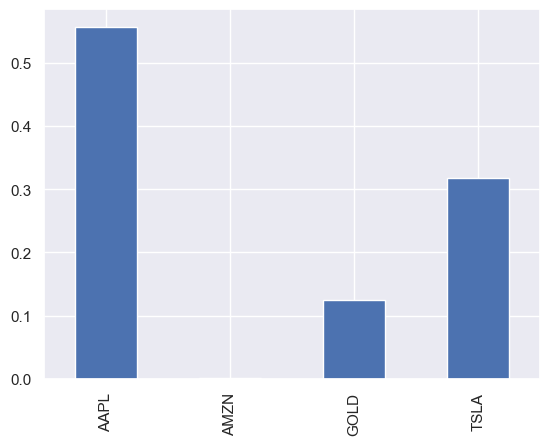

In [20]:
s.plot(kind='bar');

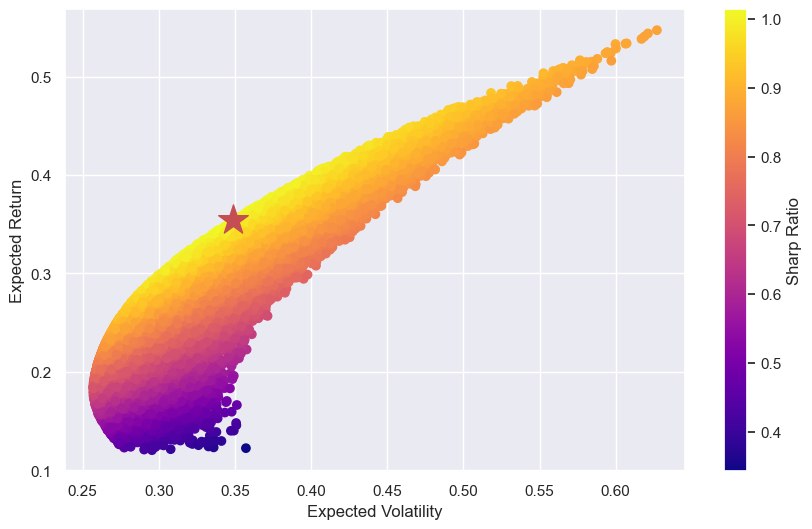

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(p_risk, p_returns, c=p_sharpe, cmap='plasma')
plt.colorbar(label='Sharp Ratio')

plt.scatter(p_risk[max_ind], p_returns[max_ind], color='r', marker='*', s=500)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return');